<a href="https://colab.research.google.com/github/kevin-r-murphy/ba820/blob/main/BA820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_json('https://raw.githubusercontent.com/kevin-r-murphy/ba820/main/News_Category_Dataset_v3.json', lines=True)
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [3]:
#shravani
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [4]:
df[df['link']=='']

,link,headline,category,short_description,authors,date


In [5]:
df[df['headline']=='']

,link,headline,category,short_description,authors,date
90944,https://www.huffingtonpost.com/entry/lincoln-2...,,POLITICS,,"Robert Moran, ContributorRobert Moran leads Br...",2015-08-22
95567,https://www.huffingtonpost.com/entry/post_9671...,,RELIGION,Let everyone not wrapped in tired and disprove...,"Matthew Fox, ContributorRadical theologian Mat...",2015-06-30
103675,https://www.huffingtonpost.com/entry/us-and-eu...,,WORLDPOST,,"Natasha Srdoc, ContributorAuthor, Economist, C...",2015-03-29
109100,https://www.huffingtonpost.com/entry/disney-ce...,,BUSINESS,,"Gary Snyder, ContributorWriter and Media Strat...",2015-01-25
110153,https://www.huffingtonpost.com/entry/beverly-h...,,MEDIA,,"Gary Snyder, ContributorWriter and Media Strat...",2015-01-13
122145,https://www.huffingtonpost.com/entry/beverly-h...,,QUEER VOICES,,"Gary Snyder, ContributorWriter and Media Strat...",2014-08-28


In [6]:
df=df[df['headline']!='']

In [7]:
df[df['category']=='']

,link,headline,category,short_description,authors,date


In [8]:
df[df['short_description']=='']

,link,headline,category,short_description,authors,date
20773,https://www.huffingtonpost.com/entry/the-big-b...,The Big Blue Wave,COMEDY,,"Shan Wells, ContributorSciency sun venerator +...",2017-11-10
21523,https://www.huffingtonpost.com/entry/inside-ru...,"Inside Rukban Camp, One Of Syria’s Most Desper...",WORLD NEWS,,"Yasser Allawi, Syria Deeply",2017-10-31
22793,https://www.huffingtonpost.com/entry/syrian-re...,Syrian Refugees Return From Lebanon Only To Fl...,WORLD NEWS,,"Abby Sewell, Refugees Deeply",2017-10-14
32223,https://www.huffingtonpost.com/entry/your-guid...,Your Guide To The Best BBQ In St. Louis Accord...,TASTE,,,2017-06-19
34488,https://www.huffingtonpost.com/entry/the-bechd...,The Bechdel Test,COMEDY,,"Hilary Fitzgerald Campbell, ContributorHilary'...",2017-05-24
...,...,...,...,...,...,...
206924,https://www.huffingtonpost.com/entry/true-lgbt...,True LGBTQ Stories: When A College Football Te...,QUEER VOICES,,"Nathan Manske, Contributor\nExecutive Director...",2012-02-25
206939,https://www.huffingtonpost.com/entry/chasing-i...,'Chasing Ice' -- The Climate Change Debate Is ...,ENVIRONMENT,,"Greg Reitman, Contributor\nFounder of Blue Wat...",2012-02-25
208803,https://www.huffingtonpost.com/entry/love-is-l...,Practice for International Kissing Day: 'Love ...,IMPACT,,"Karen Dalton-Beninato, Contributor\nWriter Nea...",2012-02-05
208865,https://www.huffingtonpost.com/entry/zach-hust...,"Zach Huston, Victim of Brutal Ohio School Bull...",QUEER VOICES,,"Ian Thompson, Contributor\nLegislative Represe...",2012-02-04


In [9]:
df=df[df['short_description']!='']

In [10]:
df[df['authors']=='']

,link,headline,category,short_description,authors,date
5,https://www.huffpost.com/entry/belk-worker-fou...,Cleaner Was Dead In Belk Bathroom For 4 Days B...,U.S. NEWS,The 63-year-old woman was seen working at the ...,,2022-09-22
20,https://www.huffpost.com/entry/golden-globes-r...,Golden Globes Returning To NBC In January Afte...,ENTERTAINMENT,"For the past 18 months, Hollywood has effectiv...",,2022-09-20
21,https://www.huffpost.com/entry/biden-us-forces...,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,,2022-09-19
31,https://www.huffpost.com/entry/2020-census-fal...,Watchdog Report Finds Some Census Takers Who F...,U.S. NEWS,"Despite entering false information, their work...",,2022-09-18
38,https://www.huffpost.com/entry/african-land-sn...,German Customs Officials Follow Trail Of Slime...,WEIRD NEWS,“Never in the history of the Duesseldorf custo...,,2022-09-16
...,...,...,...,...,...,...
209520,https://www.huffingtonpost.comhttp://www.engad...,"First White House Chief Technology Officer, An...",TECH,He was appointed with a fair bit of fanfare as...,,2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [11]:
df=df[df['authors']!='']

In [12]:
df[df['date']=='']

,link,headline,category,short_description,authors,date


In [13]:
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209517,https://www.huffingtonpost.com/entry/games-for...,Good Games -- Is It possible?,TECH,I don't think people who play Zynga games are ...,"Mateo Gutierrez, Contributor\nArtist",2012-01-28
209518,https://www.huffingtonpost.com/entry/google-pl...,Google+ Now Open for Teens With Some Safeguards,TECH,"For the most part, teens' experience on Google...","Larry Magid, Contributor\nTechnology journalist",2012-01-28
209519,https://www.huffingtonpost.com/entry/congress-...,Web Wars,TECH,"These ""Web Wars"" threaten to rage on for some ...","John Giacobbi, Contributor\nTales from the Int...",2012-01-28
209521,https://www.huffingtonpost.com/entry/watch-top...,Watch The Top 9 YouTube Videos Of The Week,TECH,If you're looking to see the most popular YouT...,Catharine Smith,2012-01-28


In [14]:
headlines = pd.DataFrame(df['headline'], columns =['headline'])
headlines = headlines['headline'].str.lower().str.replace('[^\w\s]','') #Headlines to lowercase & remove punctuation
headlines


<ipython-input-14-c2937dca89c7>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  headlines = headlines['headline'].str.lower().str.replace('[^\w\s]','') #Headlines to lowercase & remove punctuation


0         over 4 million americans roll up sleeves for o...
1         american airlines flyer charged banned for lif...
2         23 of the funniest tweets about cats and dogs ...
3         the funniest tweets from parents this week sep...
4         woman who called cops on black birdwatcher los...
                                ...                        
209517                           good games  is it possible
209518       google now open for teens with some safeguards
209519                                             web wars
209521           watch the top 9 youtube videos of the week
209522    rim ceo thorsten heins significant plans for b...
Name: headline, Length: 156859, dtype: object

In [15]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
lemma_headline = [lemmatizer.lemmatize(t) for t in headlines] #Lemmatize the headlines
lemma_headline

[nltk_data] Downloading package wordnet to /root/nltk_data...


['over 4 million americans roll up sleeves for omicrontargeted covid boosters',
 'american airlines flyer charged banned for life after punching flight attendant on video',
 '23 of the funniest tweets about cats and dogs this week sept 1723',
 'the funniest tweets from parents this week sept 1723',
 'woman who called cops on black birdwatcher loses lawsuit against exemployer',
 'reporter gets adorable surprise from her boyfriend while live on tv',
 'puerto ricans desperate for water after hurricane fionas rampage',
 'how a new documentary captures the complexity of being a child of immigrants',
 'biden at un to call russian war an affront to bodys charter',
 'world cup captains want to wear rainbow armbands in qatar',
 'man sets himself on fire in apparent protest of funeral for japans abe',
 'fiona threatens to become category 4 storm headed to bermuda',
 'twitch bans gambling sites after streamer scams folks out of 200000',
 'virginia thomas agrees to interview with jan 6 panel',
 'r

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
tfid.fit(lemma_headline)
tfid_headline = pd.DataFrame(tfid.transform(lemma_headline).toarray(), columns = tfid.get_feature_names_out()) #Vectorize the headlines

In [17]:
tfid_headline.head()

,000,0000,0001,001,007,0075,00s,03,042912,05k,...,zytiga,zz,zzs,zzzs,ça,édgar,émigrés,étienne,čechomor,ᵒᴥᵒᶅ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
print(df.nunique())

link                 156859
headline             155944
category                 42
short_description    154932
authors               28312
date                   3889
dtype: int64


In [21]:
categorical_columns = ['category']
for column in categorical_columns:
    print(f"\nDistribution of categories in column '{column}':")
    print(df[column].value_counts())


Distribution of categories in column 'category':
POLITICS          29685
ENTERTAINMENT     13463
WELLNESS          12944
TRAVEL             8024
STYLE & BEAUTY     7275
PARENTING          6520
HEALTHY LIVING     5072
QUEER VOICES       4700
FOOD & DRINK       4527
BUSINESS           4373
COMEDY             3934
SPORTS             3608
HOME & LIVING      3523
PARENTS            3491
BLACK VOICES       3313
IMPACT             2945
WOMEN              2921
WORLD NEWS         2678
THE WORLDPOST      2198
MEDIA              2105
CRIME              2093
WEIRD NEWS         1965
TASTE              1891
RELIGION           1780
WEDDINGS           1705
DIVORCE            1695
GREEN              1682
TECH               1681
MONEY              1539
STYLE              1535
SCIENCE            1428
ARTS & CULTURE     1307
WORLDPOST          1242
U.S. NEWS          1093
FIFTY              1042
GOOD NEWS           917
EDUCATION           893
LATINO VOICES       878
ARTS                863
COLLEGE       

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

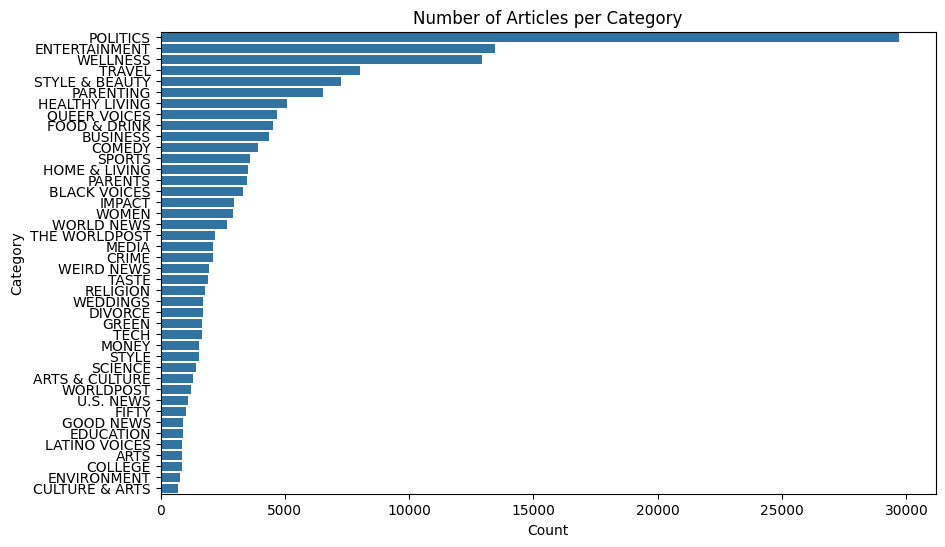

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=df, order = df['category'].value_counts().index)
plt.title('Number of Articles per Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

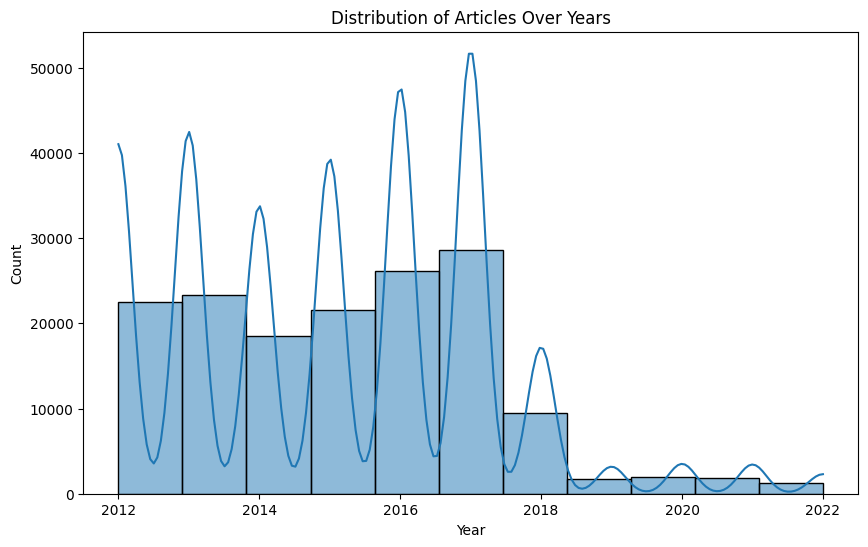

In [24]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='year', bins=len(df['year'].unique()), kde=True)
plt.title('Distribution of Articles Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

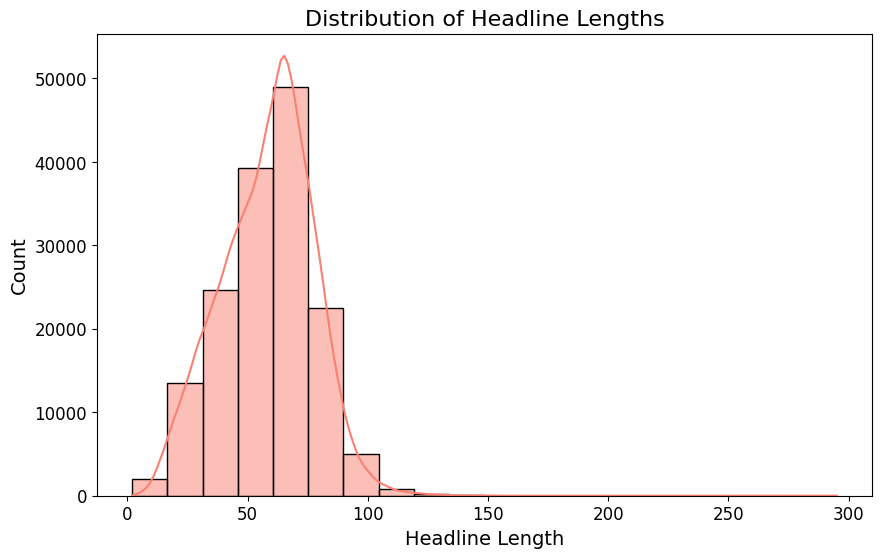

In [25]:
df['headline_length'] = df['headline'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Headline Lengths', fontsize=16)
plt.xlabel('Headline Length', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()